In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import math

In [2]:
def get_units(n):
    temp_n =n
    unit=0
    while temp_n > 9:
        temp_n = round(temp_n/10)
        unit= unit+1
    return unit

def roundoff(number,digit=1):
    temp_num = number
    temp_num = temp_num/(10**digit)
    temp_num = round(temp_num)
    return temp_num*(10**digit)

def story_view_6(followers,eng_rate=2):
    eng_num = followers*eng_rate/100
    if eng_rate<=5:
        reach = (-2.50174147e-05) * followers + 1.11329127 * eng_num
    if eng_rate>5:
        reach = 0.04176708 * followers + 0.38973658 * eng_num
    return roundoff(reach,get_units(reach)-2)
def plot(dataframe, xaxis, yaxis, Title = "No Title"):
    '''
    yaxis is array of results
    xaxis is single column
    '''
    plt.figure(figsize=(10,10))
    for y in yaxis:
        plt.plot(dataframe[xaxis].tolist(), dataframe[y].tolist(),label="{} vs {}".format(xaxis,y))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(Title)
    plt.legend()
    plt.grid(True)
    plt.show()
def heatmap(dataframe):
    corrmat = dataframe.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(10,10))
    g=sns.heatmap(dataframe[top_corr_features].corr(),annot=True,cmap="RdYlGn")
def formula_1(followers, avg_eng):
    eng_num = (followers * avg_eng)/100
    reach_low = eng_num * 0.1
    reach_high = eng_num * 8
#     return round(sum([reach_low + reach_high])/2)
    return round(1.5464*eng_num)

In [15]:
print(story_view_6(52413,1.62))
print(formula_1(12666,10.83))

944
2121


Data Len before:  324
Data Len after:  324


,id,followers,avg_engagement_month,reach,eng_num
260,86,230,34.96,40.9,80.4080
259,81,230,34.96,40.9,80.4080
253,83,569,16.51,60.4,93.9419
258,69,649,6.75,44.2,43.8075
257,82,649,6.75,44.2,43.8075


,id,followers,avg_engagement_month,reach,eng_num,predicted1,formula1,mov_avg
260,86,230,34.96,40.9,80.4080,40.9,124,NaN
259,81,230,34.96,40.9,80.4080,40.9,124,NaN
253,83,569,16.51,60.4,93.9419,60.4,145,NaN
258,69,649,6.75,44.2,43.8075,44.2,68,NaN
257,82,649,6.75,44.2,43.8075,44.2,68,46.12


324

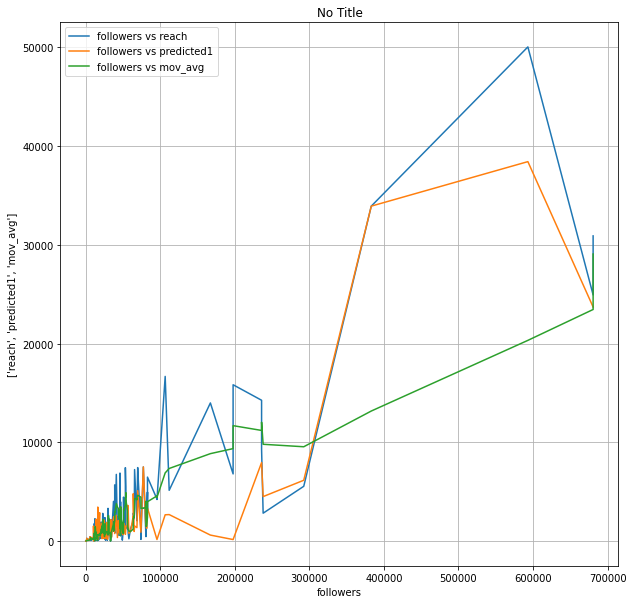

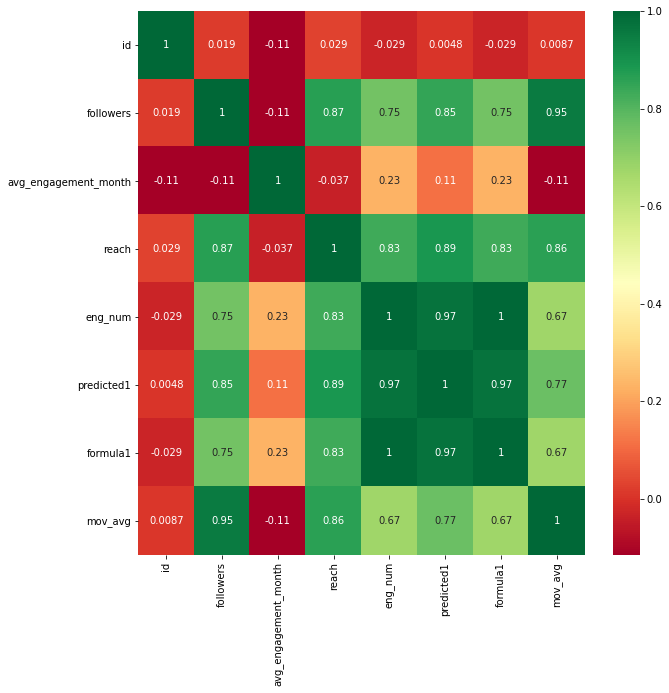

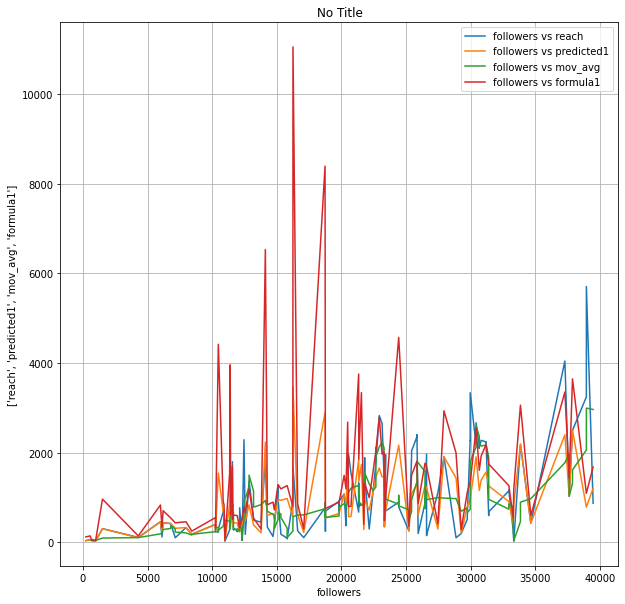

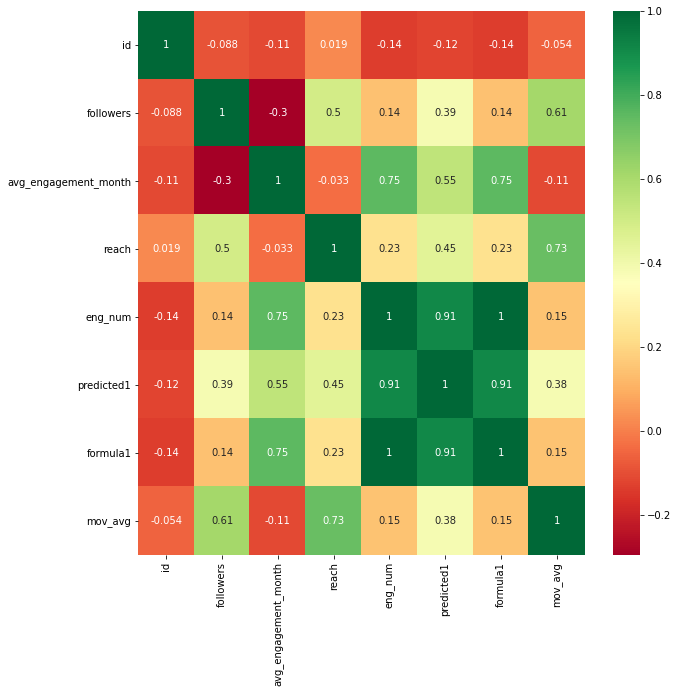

In [4]:
data1 = pd.read_csv('pre_clean_data_3.csv')
print("Data Len before: ", len(data1))
# data1 = data1.drop_duplicates()
print("Data Len after: ", len(data1))
data1 = data1.sort_values('followers')
data1['eng_num'] = [(data1.iloc[i]['followers']*data1.iloc[i]['avg_engagement_month'])/100 for i in range(len(data1))]
display(data1.head())
pred = []
for i in range(len(data1)):
    pred.append(story_view_6(data1.iloc[i]['followers'],data1.iloc[i]['avg_engagement_month']))
formula1 = []
for i in range(len(data1)):
    formula1.append(formula_1(data1.iloc[i]['followers'],data1.iloc[i]['avg_engagement_month']))
data1['predicted1'] = pred
data1['formula1'] = formula1
data1['mov_avg'] = data1['reach'].rolling(5).mean()
display(data1.head())
display(len(data1))
plot(data1, 'followers', ['reach','predicted1','mov_avg'])
heatmap(data1)
plot(data1[data1['followers'] < 40000], 'followers', ['reach','predicted1','mov_avg', 'formula1'])
heatmap(data1[data1['followers'] < 40000])

Data length:  320
Score:  0.8206818453322504
Mean Absolute Error: 1090.181104674819
Mean Squared Error: 3552879.243177471
Root Mean Squared Error: 1884.9082850837785
R2 Score: 0.9059149216853922


/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


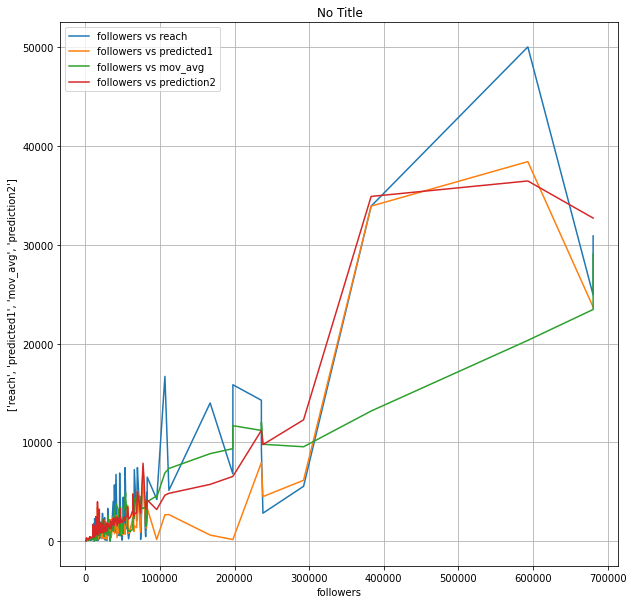

In [5]:
data2 = data1.dropna()
# data2 = data2[(data2['followers'] < 50000) & (data2['avg_engagement_month']) < 5]
# data2 = data2[data2['followers'] < 20000]
print("Data length: ", len(data2))
X = data2[["followers","eng_num"]]
# X = data2[["followers","eng_num", "total_likes"]]
y = data2['reach'].values
model2 = LinearRegression(fit_intercept=False)
model2.fit(X, y)
print("Score: ",model2.score(X,y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, model2.predict(X)))
print('Mean Squared Error:', metrics.mean_squared_error(y, model2.predict(X)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, model2.predict(X))))
print('R2 Score:', np.sqrt(metrics.r2_score(y, model2.predict(X))))

data2['prediction2'] = model2.predict(X)
# data1 = data1[data1['followers'] < 50000]
plot(data2, 'followers', ['reach','predicted1','mov_avg','prediction2'])

Score:  0.03077736384749996
Mean Absolute Error: 699.8654434419827
Mean Squared Error: 968346.0443417914
Root Mean Squared Error: 984.0457531750195
R2 Score: 0.17543478516958932


/home/soubhik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


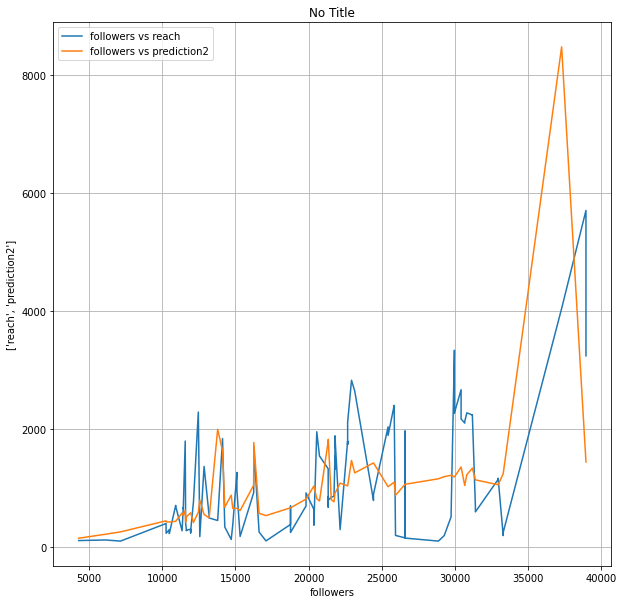

In [19]:
data3 = data1[data1['followers'] < 40000]

X = data3[["followers","eng_num", "total_likes", "ffratio"]]
y = data3['reach'].values
print("Score: ",model2.score(X,y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y, model2.predict(X)))
print('Mean Squared Error:', metrics.mean_squared_error(y, model2.predict(X)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, model2.predict(X))))
print('R2 Score:', np.sqrt(metrics.r2_score(y, model2.predict(X))))
data3['prediction2'] = model2.predict(X)
plot(data3, 'followers', ['reach','prediction2'])